In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data/sec__edgar_company_info.csv")

In [52]:
print(df.shape)
df.head()

(663000, 4)


,Line Number,Company Name,Company CIK Key,Cleaned Company Name
0,1,!J INC,1438823,J Inc
1,2,"#1 A LIFESAFER HOLDINGS, INC.",1509607,A Lifesafer Holdings Inc
2,3,#1 ARIZONA DISCOUNT PROPERTIES LLC,1457512,Arizona Discount Properties Llc
3,4,#1 PAINTBALL CORP,1433777,Paintball Corp
4,5,$ LLC,1427189,Llc


In [59]:
def cleannames(string):
    string = string.lower()
    string = string.replace('&', 'and')
    string = string.replace(',', ' ')
    string = string.replace('-', ' ')
    string = re.sub('\W+',' ', string )
    string = re.sub('\d+',' ', string )
    string = string.title()
    return string

In [60]:
df['Cleaned Company Name'] = df['Company Name'].apply(cleannames)
df.head()

,Line Number,Company Name,Company CIK Key,Cleaned Company Name
0,1,!J INC,1438823,J Inc
1,2,"#1 A LIFESAFER HOLDINGS, INC.",1509607,A Lifesafer Holdings Inc
2,3,#1 ARIZONA DISCOUNT PROPERTIES LLC,1457512,Arizona Discount Properties Llc
3,4,#1 PAINTBALL CORP,1433777,Paintball Corp
4,5,$ LLC,1427189,Llc


In [50]:
df_aggregate = pd.DataFrame(df['Cleaned Company Name'].value_counts())
df_aggregate.head()

,Cleaned Company Name
Ft,6586
Advisors Disciplined Trust,1790
Guggenheim Defined Portfolios Series,936
Van Kampen Unit Trusts Series,878
Van Kampen Unit Trusts Municipal Series,674


(array([6.17514e+05, 3.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.0000e+00, 6.5950e+02, 1.3180e+03, 1.9765e+03, 2.6350e+03,
        3.2935e+03, 3.9520e+03, 4.6105e+03, 5.2690e+03, 5.9275e+03,
        6.5860e+03]),
 <BarContainer object of 10 artists>)

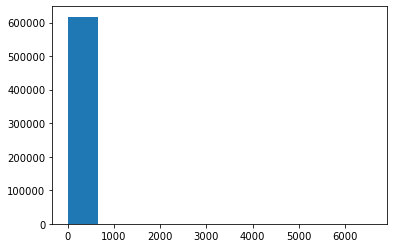

In [51]:
plt.hist(x = df_aggregate['Cleaned Company Name'], bins = 10)

## N-gram

In [55]:
import re

def ngrams(string, n =3):
    #string = string.lower()
    #string = string.replace('&', 'and')
    #string = string.replace(',', ' ')
    #string = string.replace('-', ' ')
    string = re.sub('\W+','', string )
    ngrams = zip(*[string[i:] for i in range(n)])
    return[''.join(ngram) for ngram in ngrams]

In [56]:
ngrams('A LIFESAFER HOLDINGS, INC.', 3)

['ALI',
 'LIF',
 'IFE',
 'FES',
 'ESA',
 'SAF',
 'AFE',
 'FER',
 'ERH',
 'RHO',
 'HOL',
 'OLD',
 'LDI',
 'DIN',
 'ING',
 'NGS',
 'GSI',
 'SIN',
 'INC']

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
company_names = df['Cleaned Company Name']
Vectorizer = TfidfVectorizer(min_df = 1, analyzer = ngrams, use_idf=True)
tf_idf_matrix = Vectorizer.fit_transform(company_names)

In [79]:
print(tf_idf_matrix.shape)
print(tf_idf_matrix[0])
print(ngrams('J Inc'))

(663000, 65440)
  (0, 10335)	0.21767881422574648
  (0, 10856)	0.9760204576940347
['JIn', 'Inc']


In [80]:
company_names

0                                      J Inc
1                  A Lifesafer Holdings Inc 
2            Arizona Discount Properties Llc
3                             Paintball Corp
4                                        Llc
                         ...                
662995                         Zz Global Llc
662996                 Zzif   Investment Llc
662997       Zzll Information Technology Inc
662998                               Zzx Llc
662999                 Zzyzx Zzazx Zzozx Inc
Name: Cleaned Company Name, Length: 663000, dtype: object

In [81]:
def awesome_cossim_top(A, B, ntop, lower_bound=0):
    # force A and B as a CSR matrix.
    # If they have already been CSR, there is no overhead
    A = A.tocsr()
    B = B.tocsr()
    M, _ = A.shape
    _, N = B.shape
 
    idx_dtype = np.int32
 
    nnz_max = M*ntop
 
    indptr = np.zeros(M+1, dtype=idx_dtype)
    indices = np.zeros(nnz_max, dtype=idx_dtype)
    data = np.zeros(nnz_max, dtype=A.dtype)

    ct.sparse_dot_topn(
        M, N, np.asarray(A.indptr, dtype=idx_dtype),
        np.asarray(A.indices, dtype=idx_dtype),
        A.data,
        np.asarray(B.indptr, dtype=idx_dtype),
        np.asarray(B.indices, dtype=idx_dtype),
        B.data,
        ntop,
        lower_bound,
        indptr, indices, data)

    return csr_matrix((data,indices,indptr),shape=(M,N))